In [1]:
import numpy.random as npr
import numpy as np
from time import time
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
import itertools as it

In [2]:
class sampler(object):
    """Sample integers from U(1,b) given only the ability to sample integers from U(1,a)."""
    def __init__(self, original_base, new_base):
        self.original_base = original_base
        self.new_base = new_base
        self.case_size = original_base**2 / new_base
        assert(self.case_size)
        num_cases = self.case_size * new_base
        self.all_combos = []
        for j, (a, b) in enumerate(it.product(range(1, original_base+1), repeat=2)):
            if j < num_cases:
                self.all_combos.append(10*a+b)
            else:
                self.ceiling = 10*a + b
                break
    def sample_from_new_base(self):
        """2-d sample is taken and if it's in the list, return the chunk of the list it lies in, where there are b chunks.
        """
        while True:
            a, b = npr.randint(1, self.original_base+1, 2)
            concat = 10*a + b
            if concat < self.ceiling:
                return self.all_combos.index(concat)/self.case_size + 1

Time taken: 2.4 s

Theoretical mean: 4.0
Samples mean: 3.99849 

Theoretical var: 4.0
Samples var: 4.0038677199 



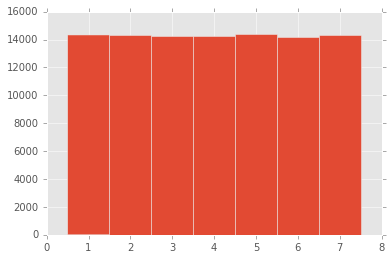

In [3]:
old_base = 5
new_base = 7
num_samples = 100000

start = time()
mysampler = sampler(old_base, new_base)
samples = np.zeros(num_samples)
for i in xrange(num_samples):
    samples[i] = mysampler.sample_from_new_base()
    #mysampler.sample_from_new_base()
tt = time()-start
print "Time taken: {} s\n".format(round(tt,1))

d = np.diff(np.unique(samples)).min()
left_of_first_bin = samples.min() - float(d)/2
right_of_last_bin = samples.max() + float(d)/2
plt.hist(samples, np.arange(left_of_first_bin, right_of_last_bin + d, d));

theoretical_mean = (1 + new_base)/2.
theoretical_var = (new_base**2-1)/12.

samples_mean = samples.mean()
samples_var = samples.var()

print "Theoretical mean:", theoretical_mean
print "Samples mean:", samples_mean, "\n"

print "Theoretical var:", theoretical_var
print "Samples var:", samples_var, "\n"